In [ ]:
pip install networkx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


Directed Graph

In [ ]:
G = nx.Graph()

G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(2, 4)
nx.draw(G, with_labels = True, font_color = 'white', node_shape='s')

Weighted Graph

In [ ]:
def show_wgraph():
    plt.figure()    
    pos = nx.spring_layout(G)
    weight_labels = nx.get_edge_attributes(G,'weight')
    nx.draw(G,pos,font_color = 'white', node_shape = 's', with_labels = True,)
    output = nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)

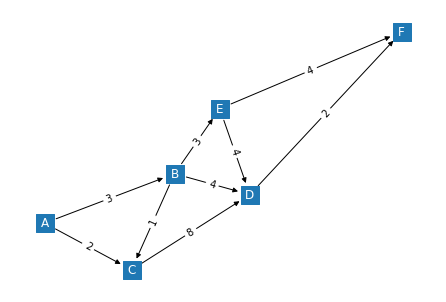

In [ ]:
G = nx.DiGraph()

G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_node('F')

G.add_edge('A', 'B', weight=3)
G.add_edge('A', 'C', weight=2)
G.add_edge('B', 'C', weight=1)
G.add_edge('B', 'E', weight=3)
G.add_edge('C', 'D', weight=8)
G.add_edge('E', 'F', weight=4)
G.add_edge('D', 'F', weight=2)
G.add_edge('B', 'D', weight=4)
G.add_edge('E', 'D', weight=4)

show_wgraph()

In [ ]:
import networkx as nx
G = nx.Graph() 
G.add_node('A') 
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_edge('A','B',relation='friend') 
G.add_edge('B','C',relation='neighbor') 
G.add_edge('B','D',relation='friend')
G.add_edge('A','D',relation='friend')  
G.add_node('A',role="Trader")
G.add_node('B',role="Trader")
G.add_node('C',role="Manager")
G.add_node('D',role="Manager")

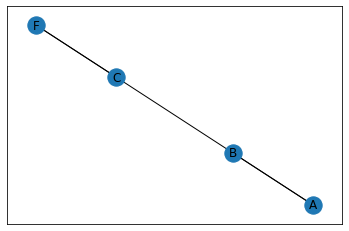

In [ ]:
nx.draw_networkx(G, pos=nx.spring_layout(G),with_labels=True)

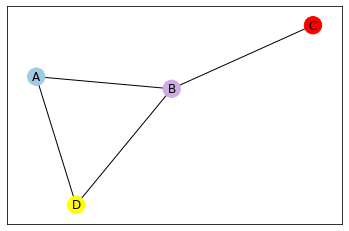

In [ ]:
nx.draw_networkx(G, pos=nx.spring_layout(G),node_color=["#A0CBE2", "#D0AAE3", "#FF0000", "#FFFF00"])

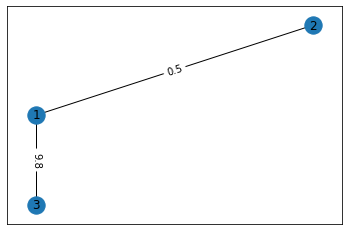

In [ ]:
#DRAW WEIGHTED GRAPH                                     
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
G.add_node(1,pos=(1,1))
G.add_node(2,pos=(2,2))
G.add_node(3,pos=(1,0))
G.add_edge(1,2,weight=0.5) 
G.add_edge(1,3,weight=9.8)
pos=nx.get_node_attributes(G,'pos')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
limits=plt.axis('on')
plt.show()                                                 
  

Total number of nodes:  4
Total number of edges:  5
List of all nodes:  ['A', 'B', 'C', 'F']
List of all edges:  [('A', 'B', {'relation': 'friend'}), ('A', 'B', {'relation': 'neighbor'}), ('B', 'C', {'relation': 'coworker'}), ('C', 'F', {'relation': 'coworker'}), ('C', 'F', {'relation': 'friend'})]
Degree for all nodes:  {'A': 2, 'B': 3, 'C': 3, 'F': 2}


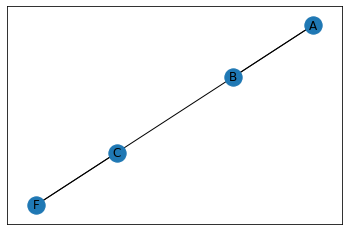

In [ ]:
#MULTIGRAPH
G = nx.MultiGraph()
G.add_edge('A','B',relation='friend')
G.add_edge('A','B',relation='neighbor')
G.add_edge('B','C',relation='coworker')
G.add_edge('C','F',relation='coworker')
G.add_edge('C','F',relation='friend')
nx.draw_networkx(G)
# getting various graph properties
print("Total number of nodes: ", int(G.number_of_nodes()))
print("Total number of edges: ", int(G.number_of_edges()))
print("List of all nodes: ", list(G.nodes()))
print("List of all edges: ", list(G.edges(data = True)))
print("Degree for all nodes: ", dict(G.degree()))



Total number of nodes:  4
Total number of edges:  3
List of all nodes:  ['A', 'B', 'C', 'F']
List of all edges:  [('A', 'B', {'sign': '+'}), ('B', 'C', {'sign': '-'}), ('C', 'F', {'sign': '-'})]
Degree for all nodes:  {'A': 1, 'B': 2, 'C': 2, 'F': 1}


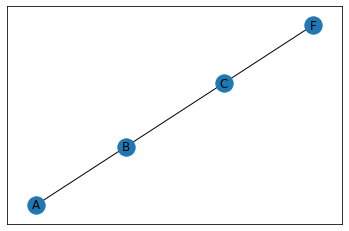

In [ ]:
#SIGNED GRAPH
G = nx.MultiGraph()
G.add_edge('A','B',sign='+')
G.add_edge('B','C',sign='-')
G.add_edge('C','F',sign='-')
nx.draw_networkx(G)
# getting various graph properties
print("Total number of nodes: ", int(G.number_of_nodes()))
print("Total number of edges: ", int(G.number_of_edges()))
print("List of all nodes: ", list(G.nodes()))
print("List of all edges: ", list(G.edges(data = True)))
print("Degree for all nodes: ", dict(G.degree()))

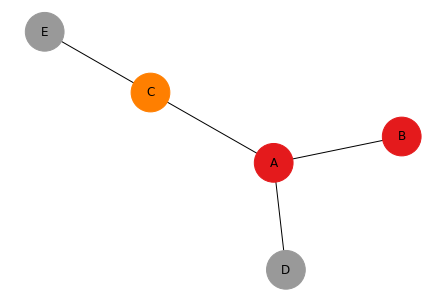

In [ ]:


#USING panda and matplotlib

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E'], 'myvalue':['group1','group1','group2','group3','group3'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=1500)

Bipartite graph


In [ ]:
B=nx.Graph() 
B.add_nodes_from(['A','B','C','D','E'],bipartite=0)
B.add_nodes_from([1,2,3,4],bipartite=1) 
B.add_edges_from([('A',1),('B',1),('C',1),('C',3), ('D',2), ('E',3),('E',4)])
nx.draw_networkx(B,pos = nx.drawing.layout.bipartite_layout(B, ['A','B','C','D','E']), width = 2)



Projected Graph

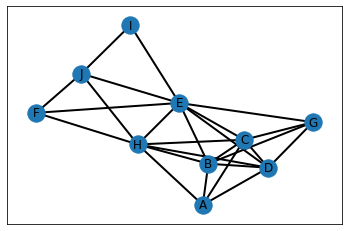

In [57]:
from networkx.algorithms import bipartite
B=nx.Graph() 
B.add_edges_from([('A',1),('B',1), ('C',1),('D',1),('H',1),('B',2),('C',2),('D',2), ('E',2),('G',2),('E',3),('F',3),('H',3),('J',3),('E',4),('I',4),('J',4)])
X=set(['A','B','C','D','E','F','G','H','I', 'J'])
P=bipartite.projected_graph(B,X)
nx.draw_networkx(P,width = 2)


In [ ]:
import networkx as nx
# Undirected Graph
G = nx.Graph()
G.add_edge('A','B')
G.add_edge('B','C')
nx.draw_networkx(G)



# Directed Graph
D = nx.DiGraph()
D.add_edge('B','A')
D.add_edge('B','C')
# Check
D.is_directed()
# True
nx.draw_networkx(D)



# Multi-Graph
M = nx.MultiGraph()
M.add_edge('B','A')
M.add_edge('B','C')
# Check
M.is_multigraph()
# True
nx.draw_networkx(M)




# Directed Multi-Graph
DM = nx.MultiDiGraph()
DM.add_edge('B','A')
DM.add_edge('B','C')
# Check
DM.is_multigraph()
# True
nx.draw_networkx(DM)



#To create a bipartite graph:
from networkx.algorithms import bipartite
B = nx.Graph()
# Add nodes
B.add_nodes_from(['A','B','C','D','E'], bipartite=0)
B.add_nodes_from([1,2,3,4], bipartite=1)
# Add edges
B.add_edges_from([('A',1),('B',1),('C',1),('C',3),('D',2),('E',3),('E',4)])
#CHeck
bipartite.is_bipartite(B)
# True
#Projected Bipartite Graph
B = nx.Graph()
B.add_edges_from([('A',1), ('B',1), ('C',1),('D',1),('H',1), \
                    ('B', 2), ('C', 2), ('D', 2),('E', 2), ('G', 2), ('E', 3), \
                    ('F', 3), ('H', 3), ('J', 3), ('E', 4), ('I', 4), ('J', 4) ])

# set of nodes to generate a projected graph from a partition
X = set(['A','B','C','D', 'E', 'F','G', 'H', 'I','J'])
P = bipartite.projected_graph(B, X)
nx.draw_networkx(P)





#EDGE TYPES
# Weighted Edges
W = nx.Graph()
W.add_edge('A','B', weight=5)
W.add_edge('B','C', weight=6)
nx.draw_networkx(W)
# Signed Edges
S = nx.Graph()
S.add_edge('A','B', sign='+')
S.add_edge('B','C', sign='-')
nx.draw_networkx(S)
# Edge Attributes
R = nx.Graph()
R.add_edge('A','B', relation='friend')
R.add_edge('B','C', relation='coworker')
R.add_edge('B','D', relation='family')
R.add_edge('A','B', relation='friend', weight=5)
nx.draw_networkx(R)



#Node Atrributes
G=nx.MultiGraph()
G.add_node('A',role='manager')
G.add_node('B',role='employee')
G.node['A']['role'] = 'team member'
G.node['B']['role'] = 'engineer'
nx.draw_networkx(G)



In [ ]:
import networkx as nx
G = nx.Graph()
G.add_edge('A','K')
G.add_edge('A','B')
G.add_edge('A','C')
G.add_edge('B','K')
G.add_edge('B','A')
G.add_edge('B','C')
G.add_edge('C','A')
G.add_edge('C','B')
G.add_edge('C','F')
G.add_edge('C','E')
G.add_edge('D','E')
G.add_edge('E','C')
G.add_edge('E','F')
G.add_edge('E','H')
G.add_edge('F','C')
G.add_edge('F','G')
G.add_edge('I','J')
nx.draw_networkx(G)


#Clustering Coefficient
# G is a graph, A is a node
nx.clustering(G, 'B')

#Global clustering
nx.average_clustering(G)

#Transistivity
nx.transitivity(G)

#SHORTEST PATH
nx.shortest_path(G, 'A', 'H')
# ['A', 'C', 'E', 'H']

nx.shortest_path_length(G, 'A', 'H')
# 3

#Breadth First Search
T = nx.bfs_tree(G, 'A')
T.edges()

#Shortest path
nx.shortest_path_length(G, 'A')



degCent = nx.degree_centrality(G)
# gives a dictionary. key = node, value = centrality ratio
degCent[34]